## SierraLeone Solar Data EDA
Objective: Profile, clean, and explore Benin solar dataset to identify trends and insights for MoonLight Energy Solutions.

In [1]:

import pandas as pd
import numpy as np

# Load dataset (example path, adjust if needed)
df = pd.read_csv("../data/raw/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])

# Quick look

# data\raw\sierraleone-bumbuna.csv
# df.info()

In [2]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [3]:
df.describe()

missing = df.isna().sum()
missing_percent=missing/len(df) *100
print(missing) # found out Comments has values that are all null


df.drop('Comments',axis=1,inplace=True)
df

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [5]:
df[['GHI']].sort_values('GHI',ascending=False)

,GHI
477421,1499.0
477418,1487.0
422703,1463.0
405408,1457.0
422701,1453.0
...,...
178275,-17.2
214281,-18.3
214282,-18.9
214284,-18.9


In [6]:
from scipy.stats import zscore

# Select numeric columns for outlier detection
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = np.abs(df[cols_to_check].apply(zscore, nan_policy='omit'))
mask = (z_scores > 3).any(axis=1)
print(f"Outlier rows: {mask.sum()}")
z_scores[(mask)]
df_clean=df[~(mask)]
df_clean
# df[mask]

Outlier rows: 16292


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [7]:
df_clean.to_csv("../data/processed/sierralenone_clean.csv", index=False)
# Note: data/ is in .gitignore, so CSV won’t be committed



# df = pd.read_csv("../data/raw/benin-malanville.csv", parse_dates=["Timestamp"])

## Timeseries Analysis


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


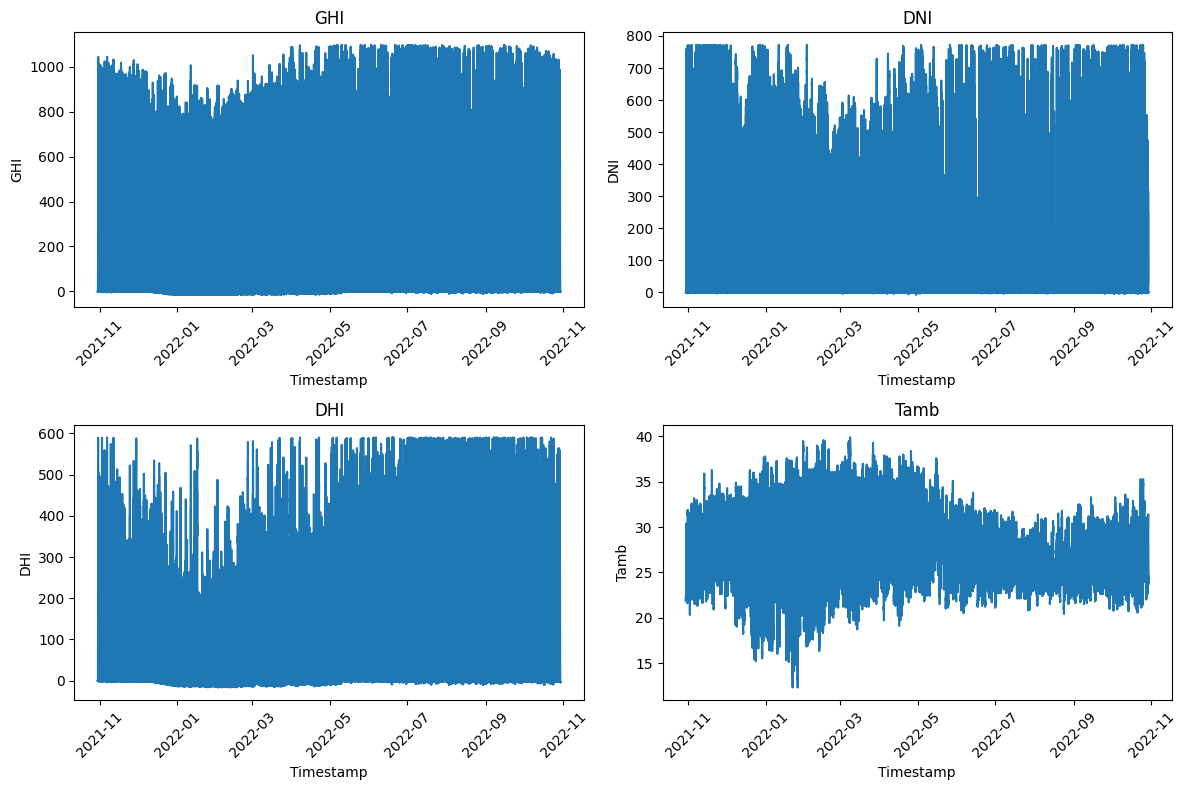

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
y_values = ["GHI", "DNI", "DHI", "Tamb"]

for i, col in enumerate(y_values):
    sns.lineplot(x="Timestamp", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [10]:
df_clean = df_clean.copy()
df_clean["DayOfWeek"] = df_clean["Timestamp"].dt.day_name()
df_clean["Month"] = df_clean["Timestamp"].dt.month_name()
df_clean["Year"] = df_clean["Timestamp"].dt.year
df_clean.loc[:, "Hour"] = df_clean["Timestamp"].dt.hour

In [11]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df_clean.loc[:, "TimeOfDay"] = df_clean["Hour"].apply(get_time_of_day)

In [12]:
df_clean

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,DayOfWeek,Month,Year,Hour,TimeOfDay
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,1002,0,0.0,22.3,22.6,Saturday,October,2021,0,Night
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,1002,0,0.0,22.3,22.6,Saturday,October,2021,0,Night
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,1002,0,0.0,22.3,22.6,Saturday,October,2021,0,Night
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,1002,0,0.1,22.3,22.6,Saturday,October,2021,0,Night
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,1002,0,0.0,22.3,22.6,Saturday,October,2021,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,...,999,0,0.0,24.2,24.5,Saturday,October,2022,23,Night
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,...,999,0,0.0,24.2,24.5,Saturday,October,2022,23,Night
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,...,1000,0,0.0,24.1,24.4,Saturday,October,2022,23,Night
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,...,1000,0,0.0,24.1,24.4,Saturday,October,2022,23,Night


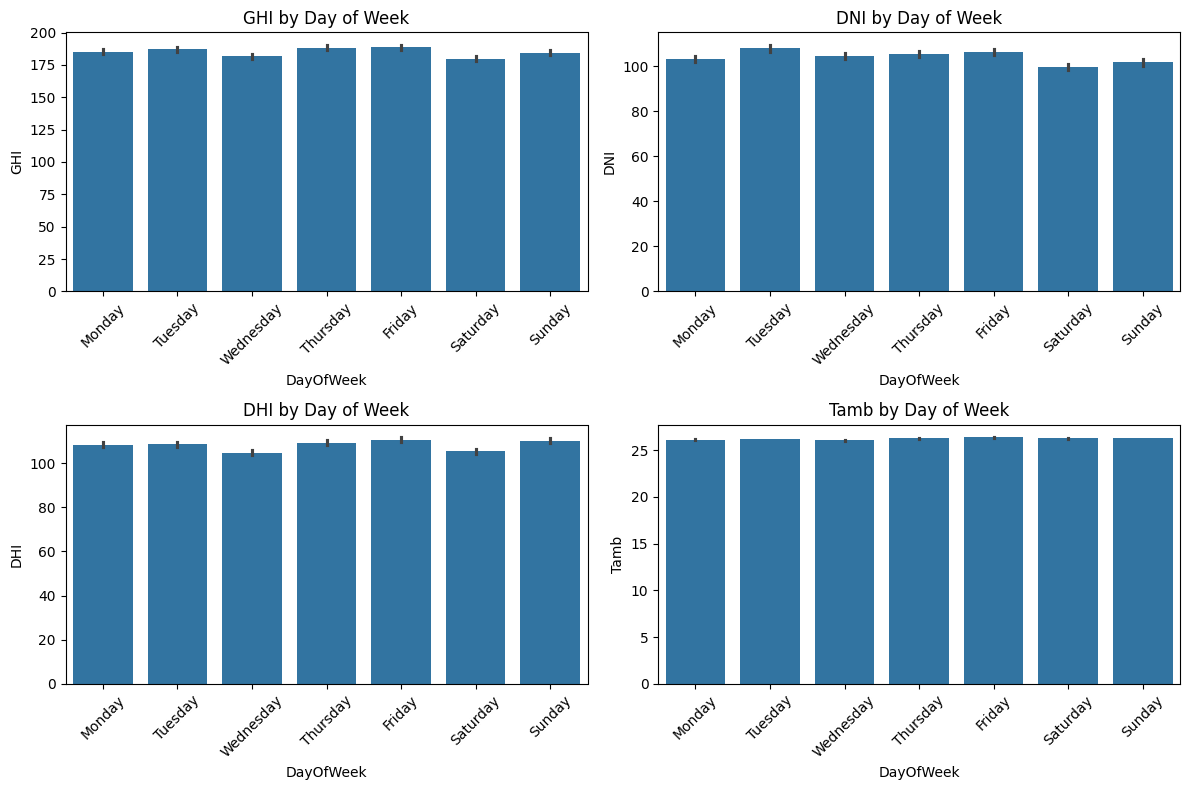

In [13]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="DayOfWeek", y=col, data=df_clean, ax=axes[i], order=day_order)
    axes[i].set_title(f"{col} by Day of Week")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

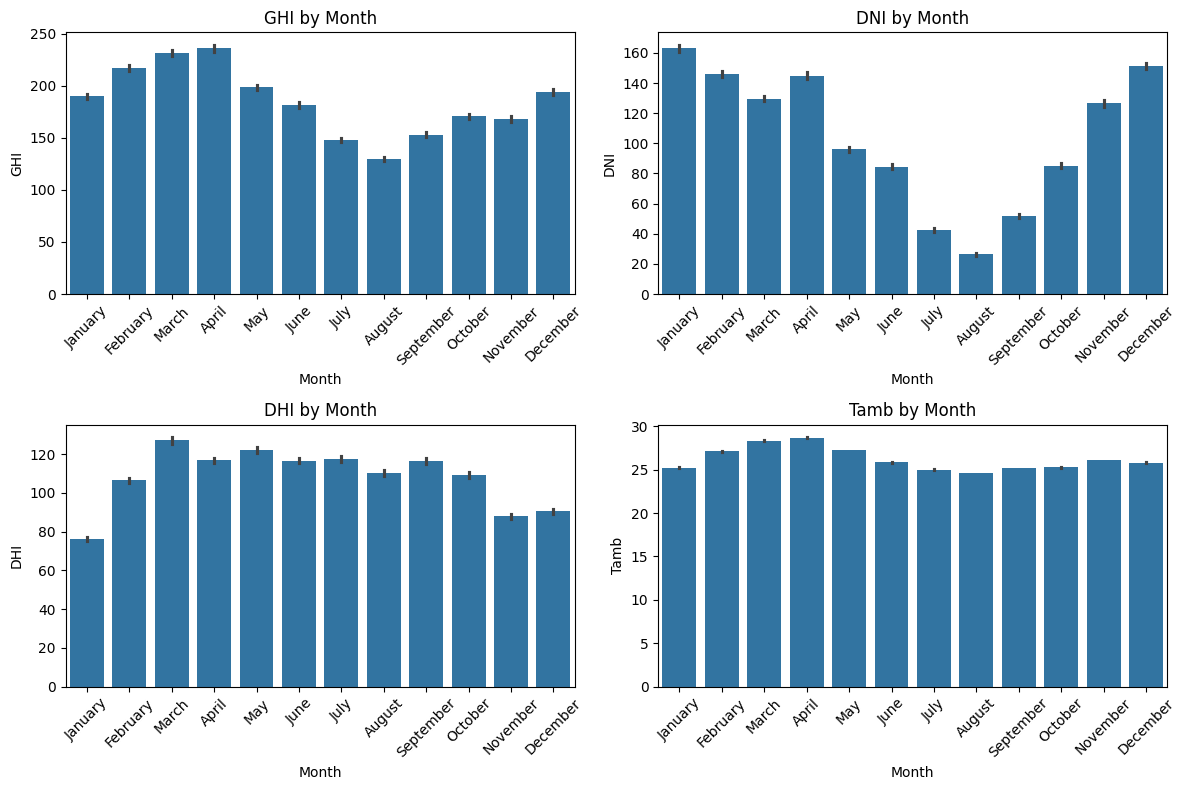

In [24]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="Month", y=col, data=df_clean, ax=axes[i], order=month_order)
    axes[i].set_title(f"{col} by Month")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

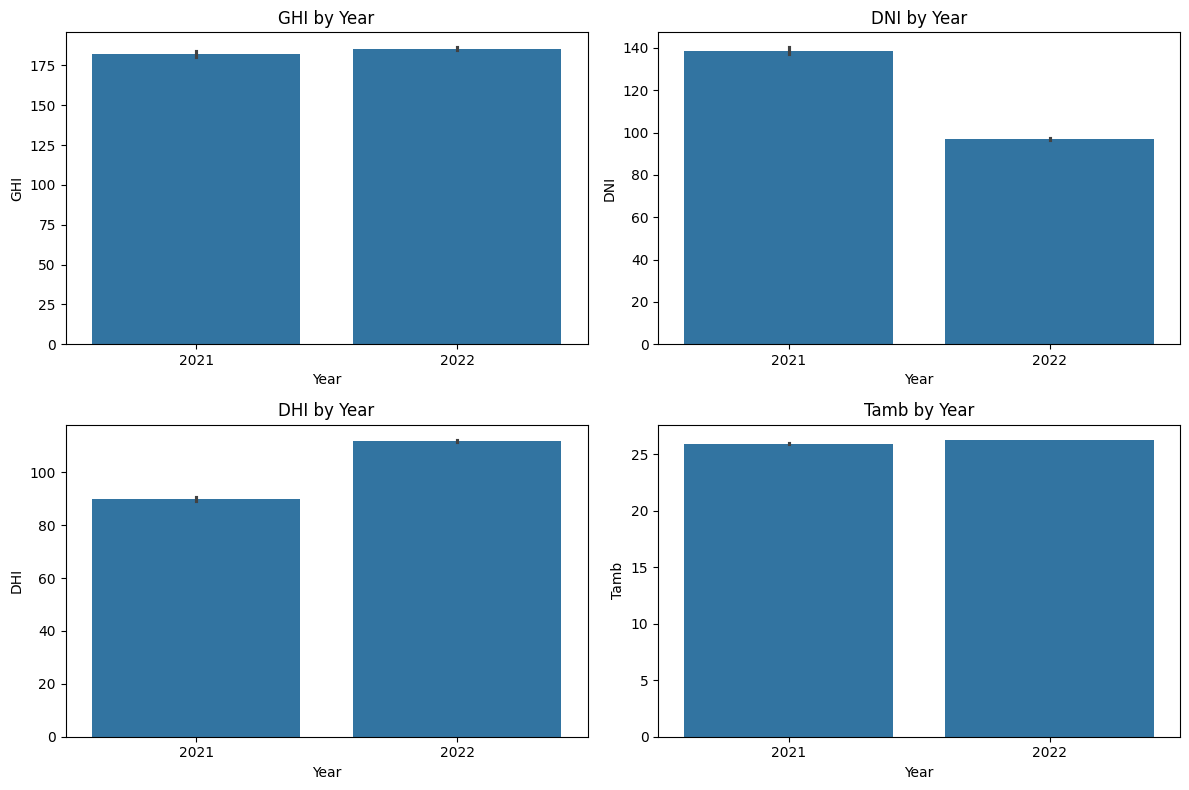

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="Year", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{col} by Year")

plt.tight_layout()
plt.show()

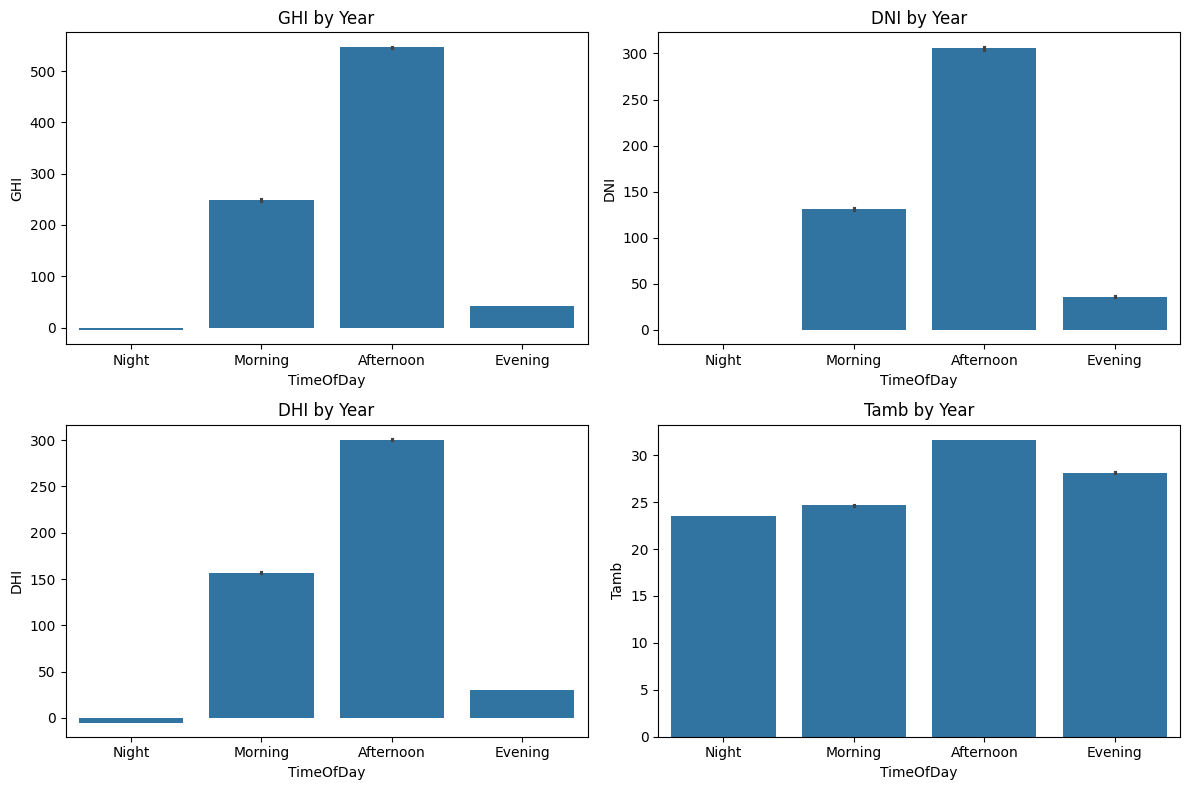

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="TimeOfDay", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{col} by Year")

plt.tight_layout()
plt.show()

Cleaning Impact

In [14]:
df_clean.groupby('Cleaning').count()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Precipitation,TModA,TModB,DayOfWeek,Month,Year,Hour,TimeOfDay
Cleaning,,,,,,,,,,,,,,,,,,,,,
0,508800,508800,508800,508800,508800,508800,508800,508800,508800,508800,...,508800,508800,508800,508800,508800,508800,508800,508800,508800,508800
1,508,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508


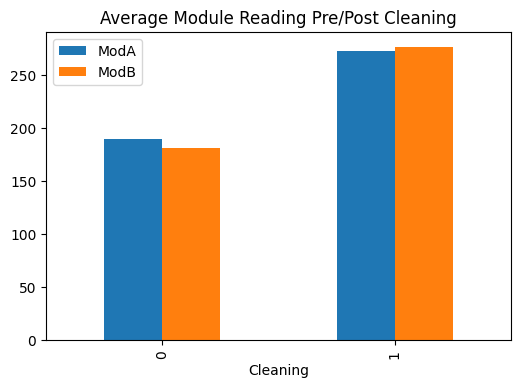

In [15]:
cleaning_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
cleaning_avg.plot(kind="bar", figsize=(6,4))
plt.title("Average Module Reading Pre/Post Cleaning")
plt.show()

Correlation & Relationship Analysis

In [16]:
corr=df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr()

In [17]:
threshold = 0.8

# Create a mask for correlations above the threshold (excluding diagonal)
mask_corr = (np.abs(corr) > threshold) & (corr != 1.0)

# Display pairs with high correlation
high_corr = corr[mask_corr]

# Drop rows and columns with all False/NaN to focus on actual correlations
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

print("Highly correlated feature pairs:")
print(high_corr)


# multicollinearity between TModA and TmodB and also between TModA and DHI,DNI , between TModB and DHI,DNI,GHI and DNI,DHI and 

Highly correlated feature pairs:
            GHI       DNI       DHI     TModA     TModB
GHI         NaN  0.861422  0.882559  0.925098  0.913510
DNI    0.861422       NaN       NaN  0.809829  0.802848
DHI    0.882559       NaN       NaN  0.824205  0.820861
TModA  0.925098  0.809829  0.824205       NaN  0.993136
TModB  0.913510  0.802848  0.820861  0.993136       NaN


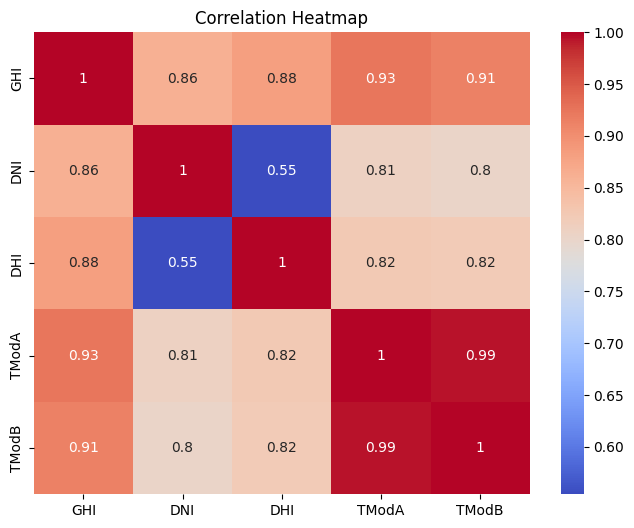

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

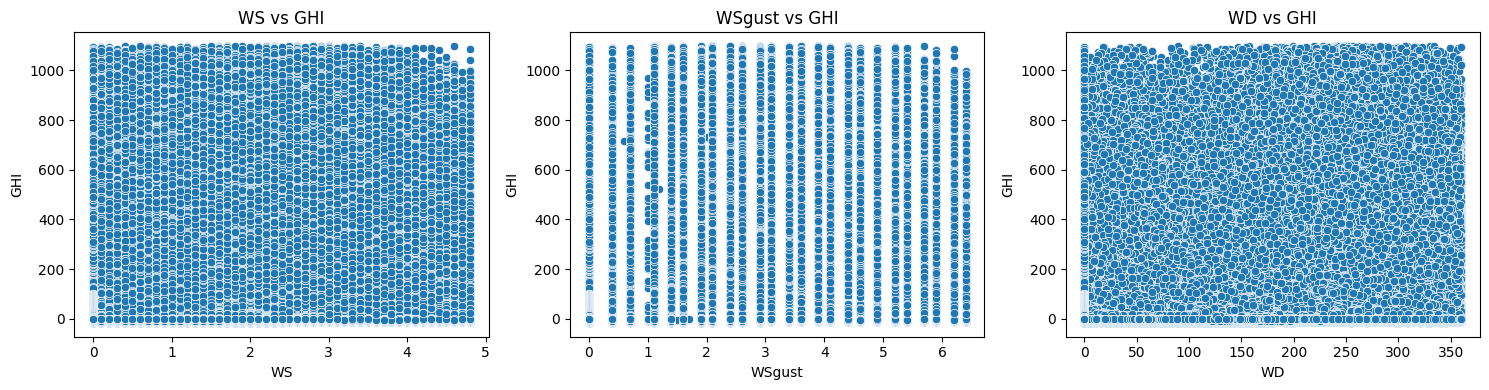

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(x="WS", y="GHI", data=df_clean, ax=axes[0])
axes[0].set_title("WS vs GHI")

sns.scatterplot(x="WSgust", y="GHI", data=df_clean, ax=axes[1])
axes[1].set_title("WSgust vs GHI")

sns.scatterplot(x="WD", y="GHI", data=df_clean, ax=axes[2])
axes[2].set_title("WD vs GHI")

plt.tight_layout()
plt.show()

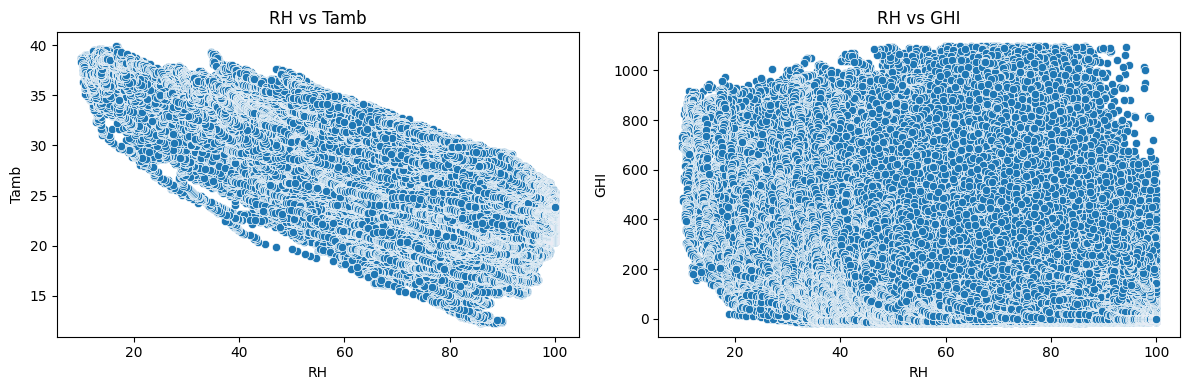

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x="RH", y="Tamb", data=df_clean, ax=axes[0])
axes[0].set_title("RH vs Tamb")

sns.scatterplot(x="RH", y="GHI", data=df_clean, ax=axes[1])
axes[1].set_title("RH vs GHI")

plt.tight_layout()
plt.show()

<Axes: xlabel='TModA', ylabel='TModB'>

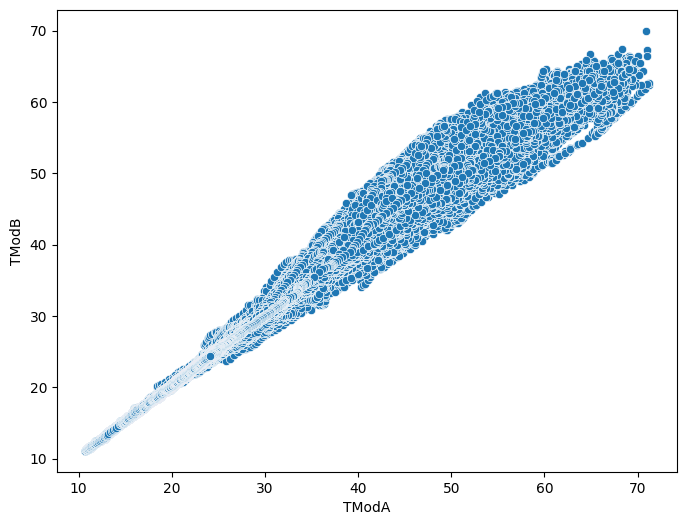

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="TModA", y="TModB", data=df_clean)

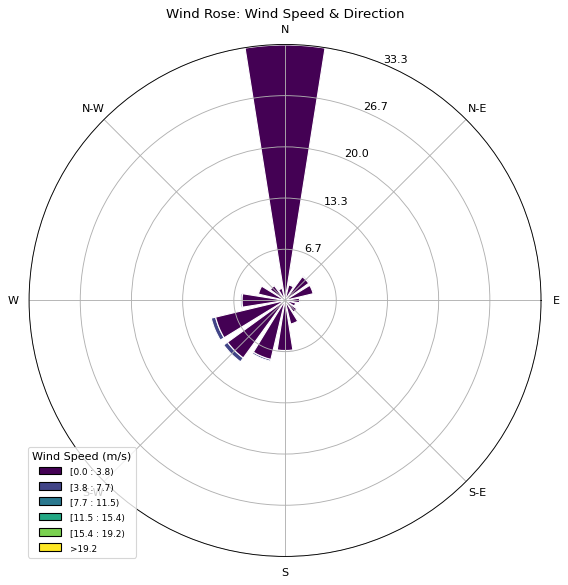

In [22]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed & Direction")
plt.show()

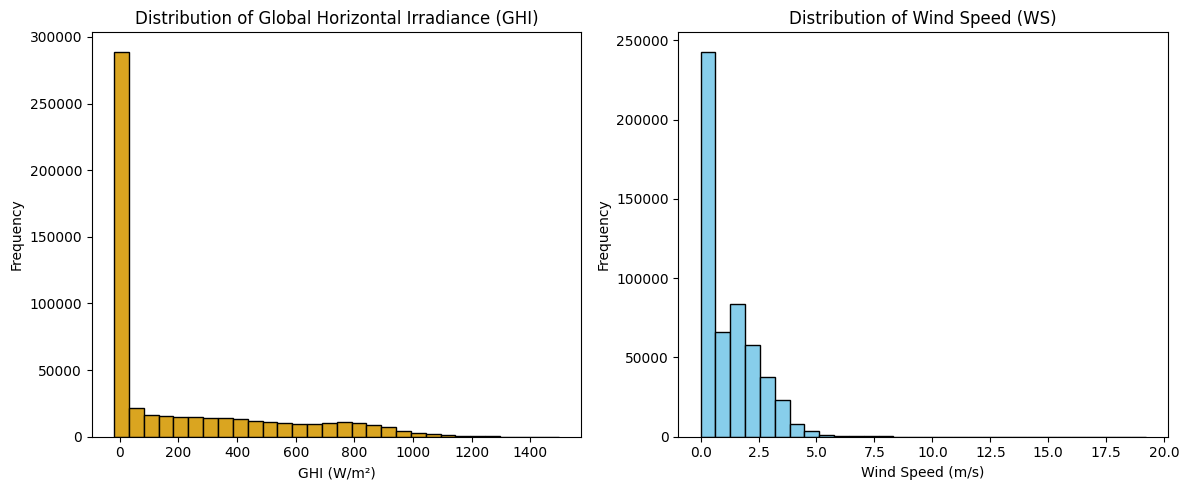

In [23]:
import matplotlib.pyplot as plt

# Histogram for GHI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='goldenrod', edgecolor='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")

# Histogram for Wind Speed (WS)
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

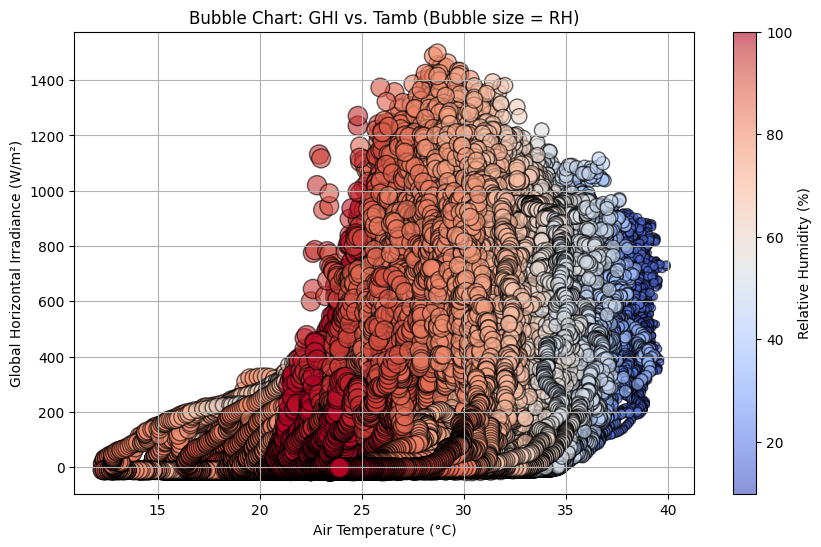

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Bubble chart with bubble size proportional to Relative Humidity
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH']*2,       # bubble size scaled by RH
            c=df['RH'],         # color mapped to RH
            cmap='coolwarm', 
            alpha=0.6, edgecolor='k')

plt.title("Bubble Chart: GHI vs. Tamb (Bubble size = RH)")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.show()